# Setup & Imports

In [1]:
import sys
import os
import pandas as pd

# Add the parent directory to sys.path to enable importing from 'src'
# This is a standard trick when notebooks are in a subfolder
sys.path.append(os.path.abspath(os.path.join('..')))

from src import data_loader, visualization

# Display settings
pd.set_option('display.max_columns', None)

# Part 1: DATA EXPLORATION AND PREPROCESSING

## 1.1 Load the Data

In [2]:
# Define path to dataset
file_path = '../data/raw/Mall_Customers.csv'

# Load the data using module
df = data_loader.load_data(file_path)

Data successfully loaded from ../data/raw/Mall_Customers.csv


## 1.2 Initial Exploration:

In [3]:
# Display first 10 rows as requested
display(df.head(10))

# Perform inspection (Shape, Dtypes, Nulls, Duplicates)
data_loader.inspect_data(df)

,CustomerID,gender,age,yearly income,pruchase spending
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


--- Data Inspection ---
Shape: (200, 5) (Rows, Columns)

Data Types:
CustomerID            int64
gender               object
age                   int64
yearly income         int64
pruchase spending     int64
dtype: object

Missing Values:
CustomerID           0
gender               0
age                  0
yearly income        0
pruchase spending    0
dtype: int64

Duplicate Rows: 0
No duplicates found.


## 1.3 Data Cleaning

In [4]:
# Drop CustomerID
df_clean = data_loader.preprocess_data(df)

# Verify the drop
print(f"New Shape: {df_clean.shape}")
display(df_clean.head(5))

# Define path for processed data
processed_file_path = '../data/processed/Mall_Customers_Clean.csv'

# Save the cleaned data
data_loader.save_data(df_clean, processed_file_path)

Dropped 'CustomerID' column.
New Shape: (200, 4)


,gender,age,yearly income,purchase spending
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


Data saved to ../data/processed/Mall_Customers_Clean.csv


# Part 2: GRAPHICAL DATA REPRESENTATION

## 2.1 Univariate Analysis

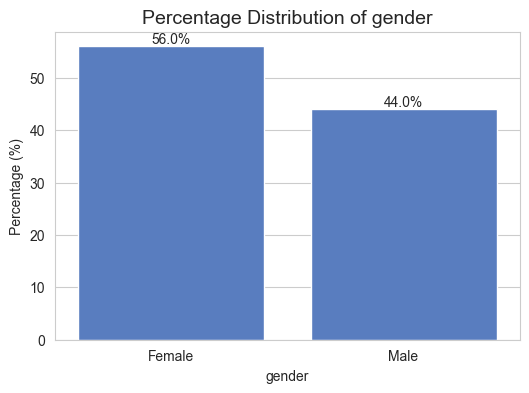

In [5]:
# 1. Gender Distribution (Percentage)
visualization.plot_gender_distribution(df_clean, 'gender')

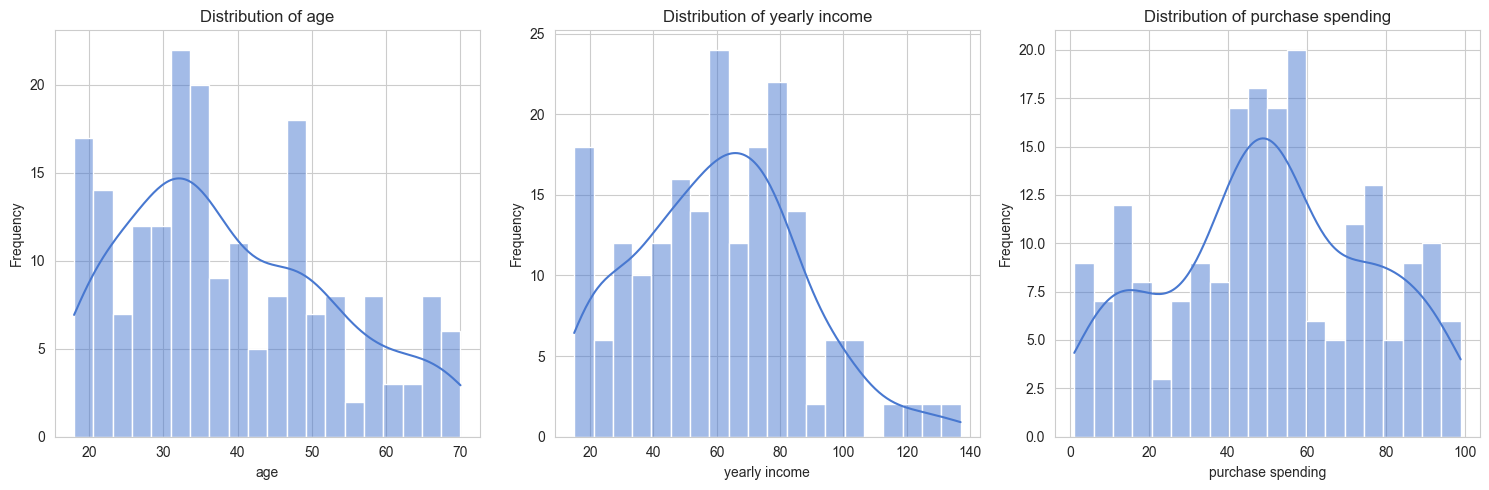

In [6]:
# 2. Histograms for Numerical Features
numerical_cols = ['age', 'yearly income', 'purchase spending']
visualization.plot_histograms(df_clean, numerical_cols)

## 2.2 Bivariate Analysis

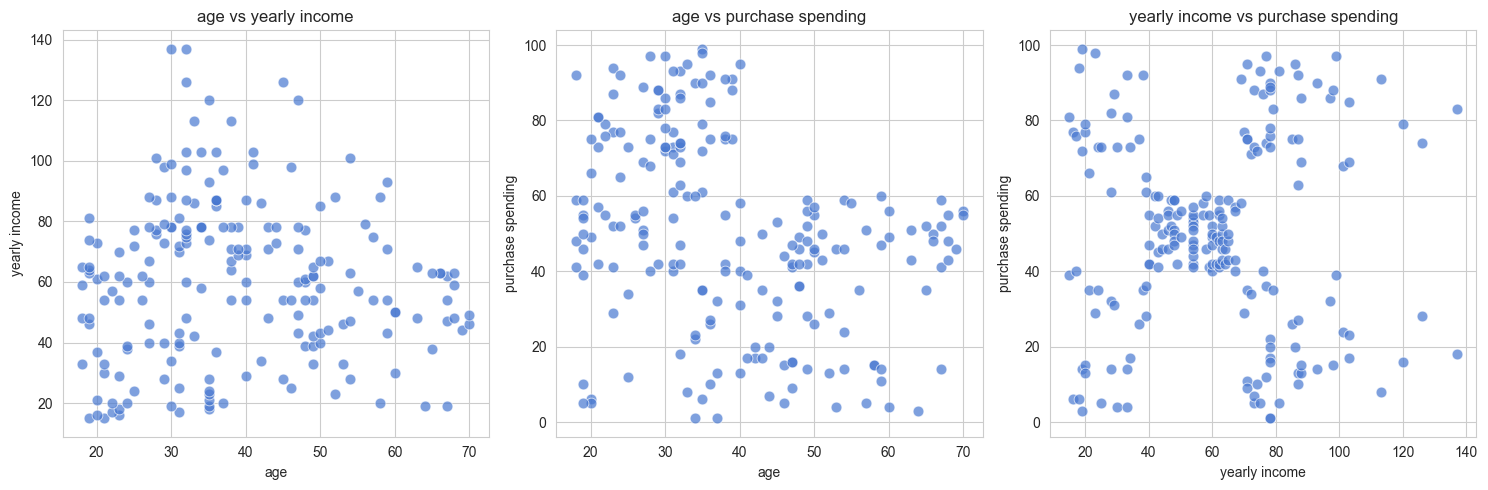

In [7]:
# Define the pairs for bivariate scatter plots
pairs = [
    ('age', 'yearly income'),
    ('age', 'purchase spending'),
    ('yearly income', 'purchase spending')
]

visualization.plot_bivariate_scatter(df_clean, pairs)

### *Question*: Based on the Yearly Income vs. purchase spending scatter plot, how many natural groups or clusters do you visually identify?

Looking at the third scatter plot (Income vs Spending), I can visually identify 5 distinct groups:
1. Low Income, Low Spending (Bottom Left)
2. Low Income, High Spending (Top Left)
3. Moderate Income, Moderate Spending (Center)
4. High Income, Low Spending (Bottom Right)
5. High Income, High Spending (Top Right)

## 3.2 Multivariate Analysis

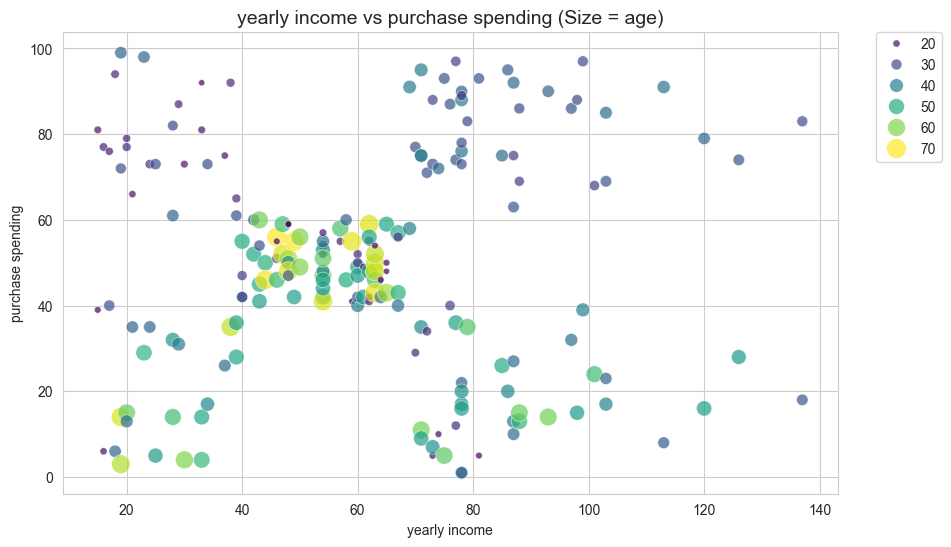

In [8]:
visualization.plot_multivariate_bubble(
    df_clean, 
    x_col='yearly income', 
    y_col='purchase spending', 
    size_col='age'
)